In [1]:
# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



Running this project require the following imports 

In [2]:
conda install -c conda-forge plotnine


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/win-64'




In [3]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [4]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



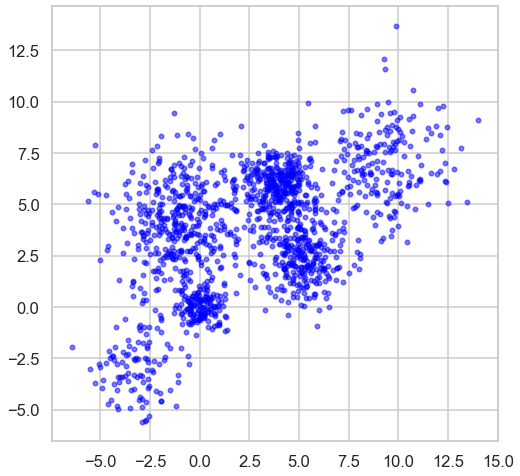

In [5]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [6]:
blob_array = np.array(Multi_blob_Data)
blob_array

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [7]:
 features, true_labels = make_blobs(
   ...:     n_samples=[100,150, 300, 400,300, 200],
   ...:     centers=[(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)],
   ...:     cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
   ...:     random_state=42
   ...: )

In [8]:
features[:5]

array([[-4.24577466e-01,  3.49781760e+00],
       [ 3.68136336e+00,  5.48375840e+00],
       [ 9.55729599e+00,  8.57125924e+00],
       [ 9.01414231e-01,  4.44568683e-02],
       [ 3.14621983e-03,  2.81883563e-02]])

In [9]:
true_labels[:5]

array([3, 4, 5, 1, 1])

In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(blob_array)


In [11]:
scaled_features[:5]

array([[-1.26719967, -2.24928146],
       [-1.2175423 , -1.5406789 ],
       [-1.50759118, -2.29017465],
       [-0.91115226, -1.86296778],
       [-1.58499121, -1.95888504]])

In [12]:
kmeans = KMeans(
       init="random",
       n_clusters=6,
        n_init=10,
       max_iter=300,
      random_state=42
)

In [13]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=6, random_state=42)

In [14]:
kmeans.inertia_

367.40124057423736

In [15]:
kmeans.cluster_centers_

array([[-0.9790114 ,  0.32086847],
       [ 0.31718045,  0.73821759],
       [-0.74794249, -1.03471934],
       [ 1.70012407,  1.12366212],
       [ 0.63517879, -0.43350959],
       [-1.47555009, -2.20876864]])

In [16]:
kmeans.n_iter_

25

In [17]:
kmeans.labels_[:5]

array([5, 2, 5, 5, 5])

In [18]:
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

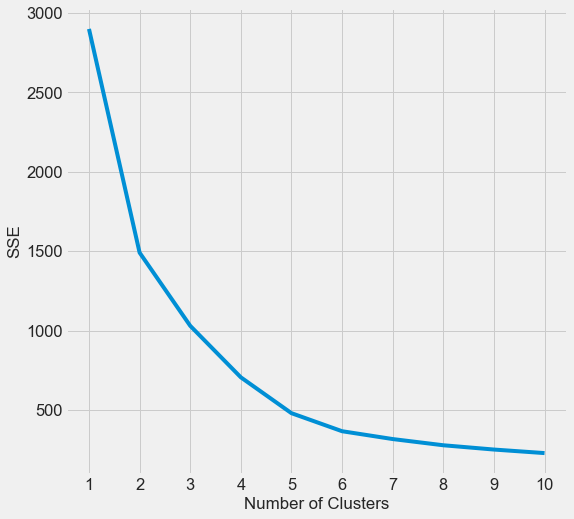

In [19]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [20]:
# df.head()

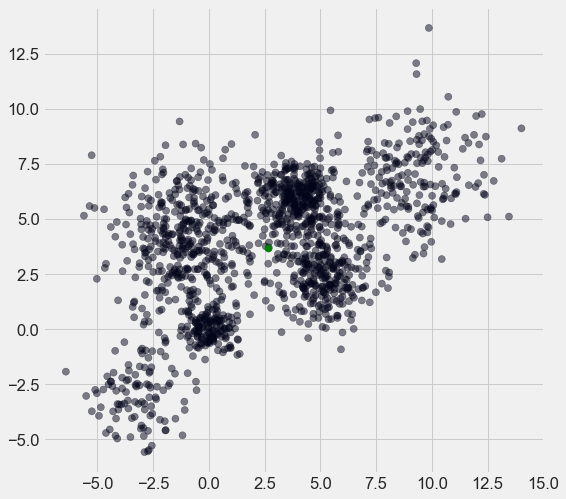

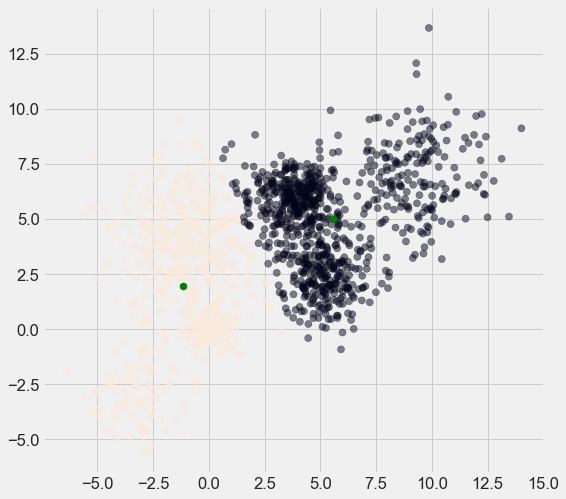

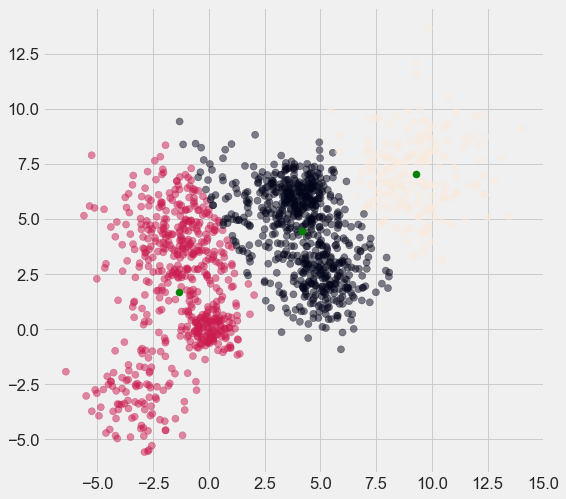

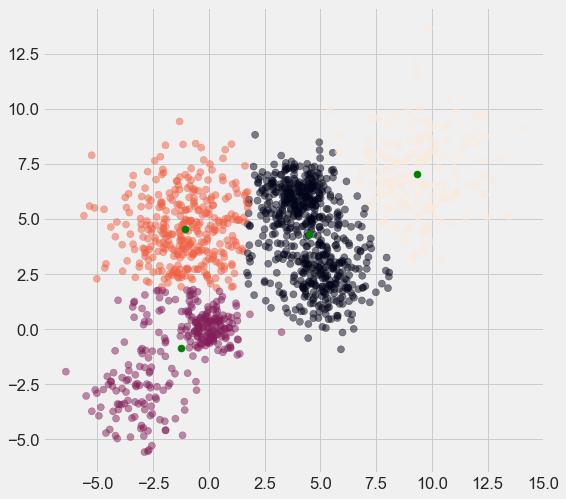

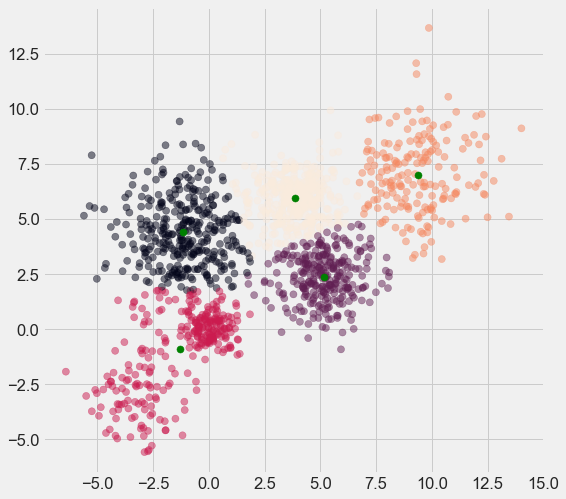

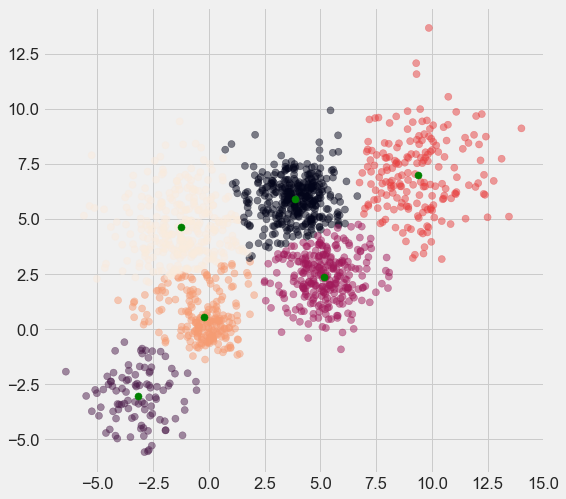

In [21]:
df = pd.DataFrame(blob_array)
array = [1,2,3,4,5,6]
for i in array:
    kmeans = KMeans(n_clusters=i).fit(df)
    centroids = kmeans.cluster_centers_
    plt.scatter(df[0], df[1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=50)
    plt.show()

In [22]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

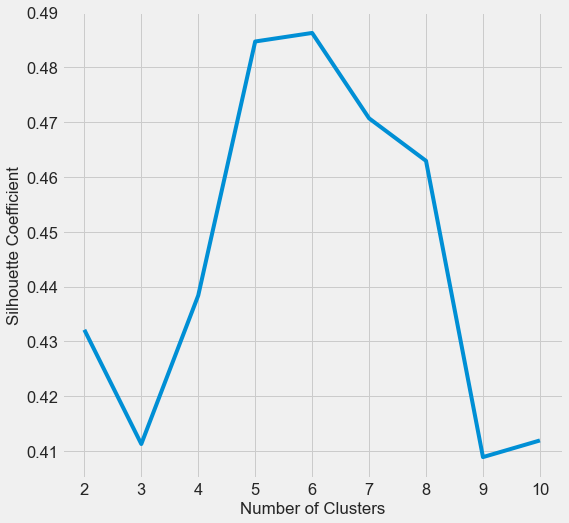

In [23]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(2, 11), silhouette_coefficients)
 plt.xticks(range(2, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("Silhouette Coefficient")
 plt.show()

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [25]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42)
scaled_features = scaler.fit_transform(features)

In [26]:
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)
kmeans_silhouette = silhouette_score(
scaled_features, kmeans.labels_)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_)

In [27]:
kmeans_silhouette

0.49664368674348447

In [28]:
dbscan_silhouette

0.3796684009045674

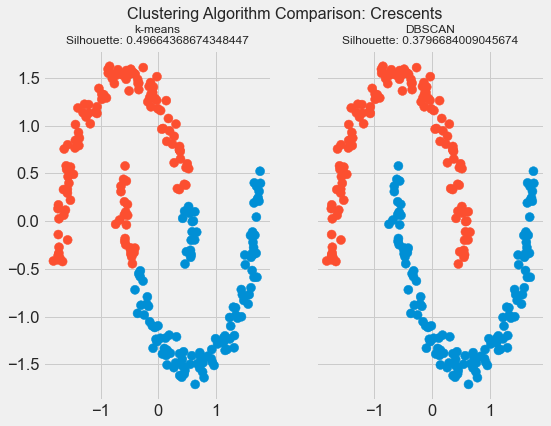

In [29]:
...: fig, (ax1, ax2) = plt.subplots(
   ...:     1, 2, figsize=(8, 6), sharex=True, sharey=True
   ...: )
   ...: fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
   ...: fte_colors = {
   ...:     0: "#008fd5",
   ...:     1: "#fc4f30",
   ...: }
   ...: # The k-means plot
   ...: km_colors = [fte_colors[label] for label in kmeans.labels_]
   ...: ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
   ...: ax1.set_title(
   ...:     f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
   ...: )
   ...:
   ...: # The dbscan plot
   ...: db_colors = [fte_colors[label] for label in dbscan.labels_]
   ...: ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
   ...: ax2.set_title(
   ...:     f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
   ...: )
   ...: plt.show()

In [30]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
   ...: ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [31]:
round(ari_kmeans, 2)

0.47

In [32]:
round(ari_dbscan, 2)

1.0

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np     

In [34]:
blob_array = np.array(Multi_blob_Data)
blob_array

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

In [35]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cluster.fit_predict(blob_array)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
print(cluster.labels_)

[1 1 1 ... 0 0 0]


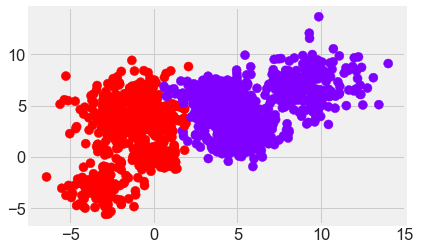

In [37]:
plt.scatter(blob_array[:,0],blob_array[:,1], c=cluster.labels_, cmap='rainbow')

In [38]:
cluster2 = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
cluster2.fit_predict(blob_array)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [39]:
print(cluster2.labels_)

[0 0 0 ... 1 1 1]


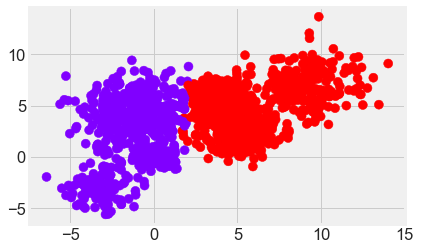

In [40]:
plt.scatter(blob_array[:,0],blob_array[:,1], c=cluster2.labels_, cmap='rainbow')

In [41]:
cluster3 = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
cluster3.fit_predict(blob_array)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

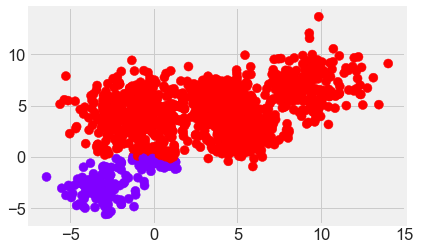

In [42]:
plt.scatter(blob_array[:,0],blob_array[:,1], c=cluster3.labels_, cmap='rainbow')

In [43]:
cluster4 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
cluster4.fit_predict(blob_array)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

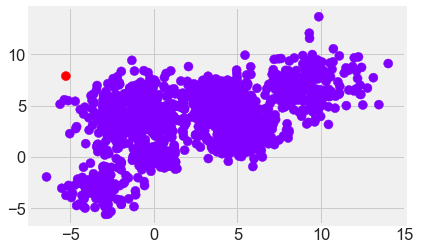

In [44]:
plt.scatter(blob_array[:,0],blob_array[:,1], c=cluster4.labels_, cmap='rainbow')

In [45]:
cluster5 = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='single')
cluster5.fit_predict(blob_array)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

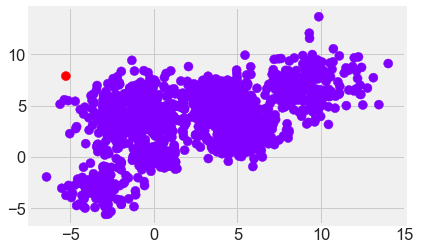

In [46]:
plt.scatter(blob_array[:,0],blob_array[:,1], c=cluster5.labels_, cmap='rainbow')

In [47]:
cluster6 = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='single')
cluster6.fit_predict(blob_array)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

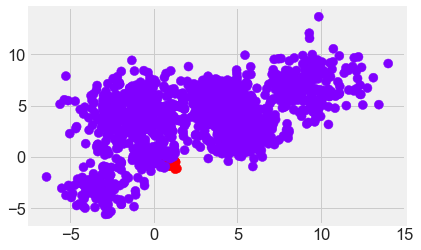

In [48]:
plt.scatter(blob_array[:,0],blob_array[:,1], c=cluster6.labels_, cmap='rainbow')

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [50]:
blob_array = np.array(Multi_blob_Data)
blob_array

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

In [51]:
blob_array.shape

(1450, 2)

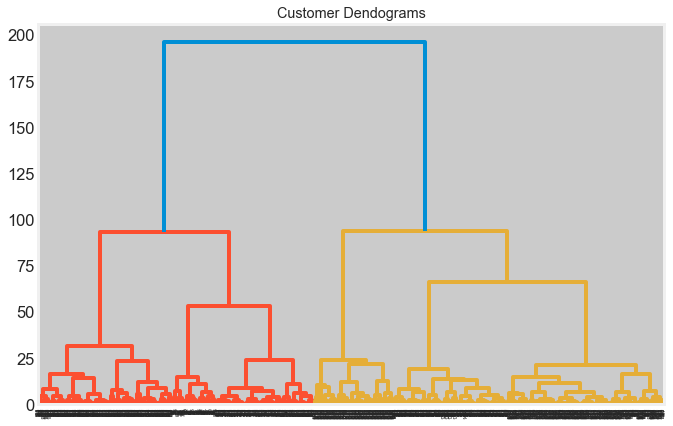

In [52]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(blob_array, method='ward'))

In [53]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(blob_array)

array([0, 0, 0, ..., 2, 3, 2], dtype=int64)

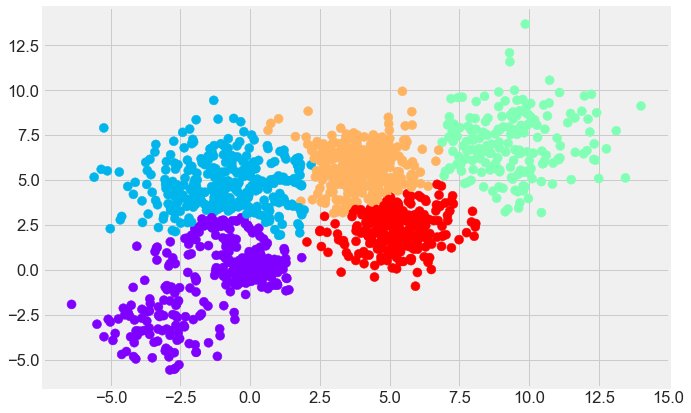

In [54]:
plt.figure(figsize=(10, 7))
plt.scatter(blob_array[:,0], blob_array[:,1], c=cluster.labels_, cmap='rainbow')

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
blob_array = np.array(Multi_blob_Data)
blob_array

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

In [57]:
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=2) 
nbrs=neighb.fit(blob_array) 
distances,indices=nbrs.kneighbors(blob_array)

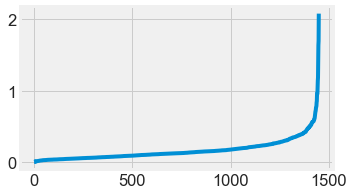

In [58]:
distances = np.sort(distances, axis = 0) 
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances)
plt.show()

In [59]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.5, min_samples = 10).fit(blob_array) 
labels = dbscan.labels_ 

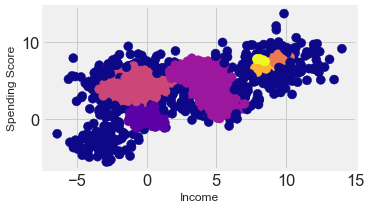

In [60]:
plt.scatter(blob_array[:, 0], blob_array[:,1], c = labels, cmap= "plasma") 
plt.xlabel("Income") 
plt.ylabel("Spending Score") 
plt.show() #

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

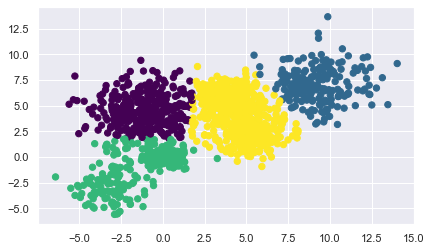

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(blob_array).predict(blob_array)
plt.scatter(blob_array[:, 0], blob_array[:, 1], c=labels, s=40, cmap='viridis');

In [63]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, blob_array, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(blob_array)

    
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(blob_array[:, 0], blob_array[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    
    centers = kmeans.cluster_centers_
    radii = [cdist(blob_array[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

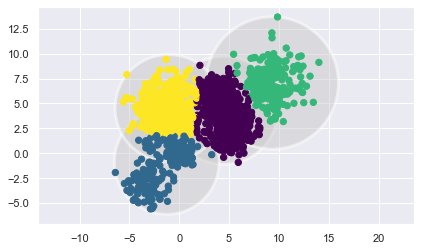

In [64]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, blob_array)


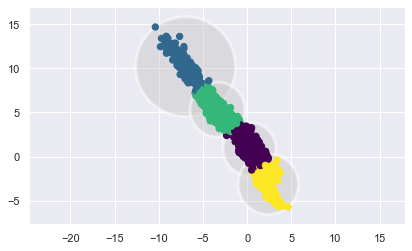

In [65]:
rng = np.random.RandomState(13)
X_stretched = np.dot(blob_array, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

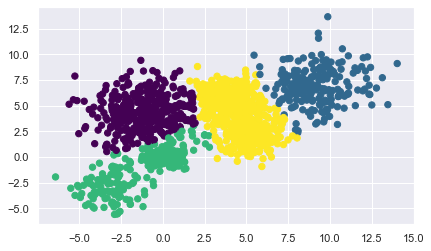

In [66]:
# from sklearn.mixture import GMM
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4).fit(blob_array)
# gmm = GMM(n_components=4)
labels = gmm.predict(blob_array)
plt.scatter(blob_array[:, 0], blob_array[:, 1], c=labels, s=40, cmap='viridis');

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [67]:
from sklearn.datasets import load_iris
# iris = load_iris()

data = load_iris()
data
iris = pd.DataFrame(data=np.c_[data['data'], iris_data['target']], columns = iris_data['feature_names'] + ['target'])
iris.head()

NameError: name 'iris_data' is not defined

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv(r"C:\Users\mosta\Downloads\GUC_2350_56_17328_2022-02-22T14_59_49\Customer data.csv")
data.sample(5)

In [ ]:
# split data into features (X) and labels (y)
# data = data.drop('ID', axis=1)
X = data.iloc[:,[0,1,3,4,5,6]]
y = data.iloc[:,2]
print(X.sample(5))
print(y.sample(5))
data.head()

In [ ]:
y.head()

In [ ]:
X.head()

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

In [ ]:
# try clustering on the 4d data and see if can reproduce the actual clusters.

# ie imagine we don't have the species labels on this data and wanted to
# divide the flowers into species. could set an arbitrary number of clusters
# and try dividing them up into similar clusters.

# we happen to know there are 3 species, so let's find 3 species and see
# if the predictions for each point matches the label in y.

from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

In [ ]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

In [ ]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

In [ ]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Age'] = data['Age']
df_scores.hist(by='Age', column='SilhouetteScore', range=(0,1.0), bins=20);

In [ ]:
sns.pairplot(df_scores, hue="Age", size=4);

In [ ]:
from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

In [ ]:
y_id_array = pd.Categorical(data['Age']).codes
df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['AgeID'] = y_id_array # also add actual labels so we can use it in later plots
df_plot.sample(5)

In [ ]:
def plotData(df, groupby):

    fig, ax = plt.subplots(figsize = (7,7))

    
    cmap = mpl.cm.get_cmap('prism')


    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, 
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)),
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

In [ ]:
import matplotlib as mpl

plotData(df_plot, 'AgeID')

In [ ]:


from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)


y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

In [ ]:
# add the GMM clusters to our data table and plot them
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [ ]:


from sklearn.metrics.cluster import adjusted_rand_score


score = adjusted_rand_score(y, y_cluster_kmeans)
score

In [ ]:
 
score = adjusted_rand_score(y, y_cluster_gmm)
score